In [1]:
import numpy as np
import scipy.io.wavfile as wav

from matplotlib import pyplot as plt
fig_size = [0,0]
fig_size[0] = 5
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

In [2]:
(sample_rate,raw_signals_1) = wav.read('data/LargeRoom08-0103/Large004.wav')

/Users/cstephenson/anaconda/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


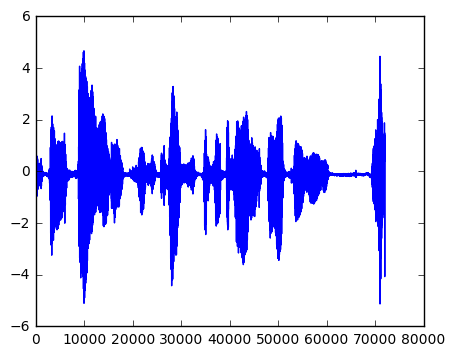

In [16]:
start  = 2000000
end = start + 3*sample_rate

test_signal = raw_signals_1[:,10]
test_signal = (test_signal + test_signal.mean())/test_signal.std()

plt.plot(test_signal[start:end])
plt.show()

In [155]:
#Scale in px/m
scale = 20

v_s = 330*scale

room_size = 10*scale
room = np.zeros((room_size,room_size))
mics = [(room_size//2,room_size//4),(room_size//2+0.1*scale,room_size//4)]

const = np.mean(test_signal[start:end]*test_signal[start:end])

def calc_delay(mic,i,j):
    distance = np.sqrt(pow(mic[0]-i,2)+pow(mic[1]-j,2))
    return int(distance/v_s * sample_rate)
    
def calc_power(signal,delay_1,delay_2):
    sig_1 = signal[start-delay_1:end-delay_1]
    sig_2 = signal[start-delay_2:end-delay_2]
    
    combined_signal = 1/2*(sig_1 + sig_2)
    return np.mean(combined_signal*combined_signal)/const

In [160]:
extra_delay = -2

for i in range(room_size):
    for j in range(room_size):
        d_1 = calc_delay(mics[0],i,j)
        d_2 = calc_delay(mics[1],i,j) + extra_delay
        
        power = calc_power(test_signal,d_1,d_2)
        room[i,j] = power

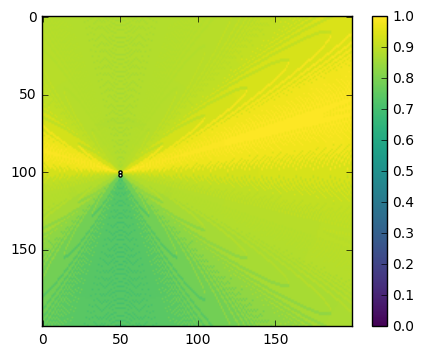

In [161]:
plt.scatter(mics[0][1],mics[0][0],s=5,c='white', marker='o')
plt.scatter(mics[1][1],mics[1][0],s=5,c='white', marker='o')

plt.imshow(room,cmap='viridis',vmin=0,vmax=1)
plt.colorbar()
plt.show()